## Load a dataset and run a UMAP reduction

In [1]:
import pathlib
from umap_manager import UMAPManager

# case = 'tiny_case'
# case = 'TCGA-3C-AALI-01Z-00-DX1'
case = 'TCGA-3C-AALK-01Z-00-DX1'
DATA_DIR = pathlib.Path(f'../TCGA/downloads/{case}')

# instantiate manager
manager = UMAPManager(DATA_DIR)

Reading HIPS data.
Found 412219 features.


View the data that was read by the manager

In [2]:
manager.data.head(5)

,Identifier.Xmin,Identifier.Ymin,Identifier.Xmax,Identifier.Ymax,Identifier.CentroidX,Identifier.CentroidY,ClassifProbab.CancerEpithelium,ClassifProbab.StromalCellNOS,ClassifProbab.ActiveStromalCellNOS,ClassifProbab.TILsCell,...,Cytoplasm.Haralick.Entropy.Mean,Cytoplasm.Haralick.Entropy.Range,Cytoplasm.Haralick.DifferenceVariance.Mean,Cytoplasm.Haralick.DifferenceVariance.Range,Cytoplasm.Haralick.DifferenceEntropy.Mean,Cytoplasm.Haralick.DifferenceEntropy.Range,Cytoplasm.Haralick.IMC1.Mean,Cytoplasm.Haralick.IMC1.Range,Cytoplasm.Haralick.IMC2.Mean,Cytoplasm.Haralick.IMC2.Range
0,156.0,1.0,168.0,13.0,163.0,5.0,0.663089,0.014663,0.038740,0.004568,...,4.942946,0.389994,0.011302,0.002690,1.526934,0.330982,-0.355494,0.147225,0.935332,0.056254
1,144.0,3.0,159.0,17.0,151.0,10.0,0.643533,0.013569,0.021799,0.004250,...,5.111745,0.367764,0.011247,0.001905,1.522941,0.269881,-0.360213,0.111018,0.943050,0.040722
2,173.0,9.0,181.0,17.0,176.0,13.0,0.515824,0.041030,0.091885,0.020103,...,4.092249,0.516375,0.013914,0.005328,1.422163,0.587685,-0.518847,0.179282,0.969338,0.030496
3,125.0,15.0,140.0,30.0,132.0,22.0,0.493631,0.011201,0.031783,0.006976,...,5.465805,0.409435,0.010066,0.002532,1.692618,0.365311,-0.335387,0.128800,0.939154,0.054552
4,172.0,21.0,185.0,33.0,178.0,27.0,0.489929,0.012323,0.074366,0.009782,...,4.731008,0.320638,0.011195,0.002502,1.603936,0.340192,-0.371728,0.115569,0.938464,0.040900


View the image that was read by the manager

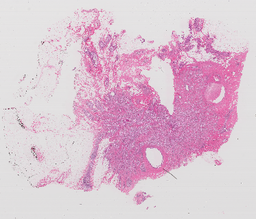

In [3]:
manager.image

Show thumbnails of the first fifty cells in the data

In [4]:
manager.show_cell_thumbnails(range(50))

GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00,\x00\x00\x00$\x08\x02\x00\x00\…

Reduce dims for 500 random cells and plot the result. Try using the lasso-select tool to view thumbnails of selected cells.

In [5]:
manager.sample(500)
output = manager.reduce_dims(plot=True)
print(output.shape)

FigureWidget({
    'data': [{'marker': {'color': {'bdata': ('AAABAAIAAwAEAAUABgAHAAgACQAKAA' ... 'HqAesB7AHtAe4B7wHwAfEB8gHzAQ=='),
                                   'dtype': 'i2'}},
              'mode': 'markers',
              'type': 'scatter',
              'uid': '7cdd08fe-11fc-42c7-aad2-a41d423eaa29',
              'x': {'bdata': ('DOPLQIVM60C/5YBA2e42QWsG20Dpxi' ... 'BATuTqQGwvz71aQuFAp2JiwLYoqkA='),
                    'dtype': 'f4'},
              'y': {'bdata': ('HTwdvsSsO0AEO7A7GGsuQDzOk72Mzz' ... 'A/kW1AQGdESUChTBZAgYjAQN+l4D8='),
                    'dtype': 'f4'}}],
    'layout': {'template': '...'}
})

VBox()

(500, 2)


## Compare UMAP results in an animation

Compare results for different values for the ``random_state`` argument

In [6]:
# reductions = {}
# for i in range(0, 20):
#     reductions[f'random state {i}'] = dict(
#         random_state=i, 
#         init='random',
#         n_jobs=1,
#     )
# manager.compare_reductions(**reductions)

Compare results for different values for the ``n_neighbors`` argument

In [7]:
# # prior to running another comparison, reset manager to defaults
# manager.reset()
# # sample another 500 random cells
# manager.sample(500)

# reductions = {}
# for i in range(3, 30):
#     reductions[f'{i} neighbors'] = dict(
#         n_neighbors=i,
#         # ensure that compared reductions start from the same random state
#         random_state=0, 
#         n_jobs=1,
#     )
# manager.compare_reductions(**reductions)

Exclude columns from the data

In [8]:
# column_patterns = ['slide', 'roiname', 'Identifier.', 'ClassifProbab.', 'Cytoplasm.', 'Nucleus.']
# manager.exclude_columns = [
#     c for c in manager.columns
#     if any(p in c for p in column_patterns)
# ]
# manager.data.head(5)

Compare results when excluding different sets of columns

In [9]:
# # prior to running another comparison, reset manager to defaults
# manager.reset()
# # sample another 500 random cells
# manager.sample(500)

# reductions = {}
# for i in range(0, 20):
#     exclude_columns = [
#         c for c in manager.columns
#         if any(p in c for p in column_patterns[:i])
#     ]
#     reductions[f'exclude {len(exclude_columns)} columns'] = dict(
#         exclude_columns=exclude_columns,
#         # ensure that compared reductions start from the same random state
#         random_state=0, 
#         n_jobs=1,
#     )
# manager.compare_reductions(**reductions)

Compare results for different values for the ``metric`` argument

In [10]:
# # prior to running another comparison, reset manager to defaults
# manager.reset()
# # sample another 500 random cells
# manager.sample(500)

# metrics = [
#     'euclidean', 'manhattan', 'chebyshev', 
#     'minkowski', 'canberra', 'braycurtis', 
#     'mahalanobis', 'wminkowski', 'cosine', 'correlation'
# ]
# reductions = {}
# for metric in metrics:
#     reductions[metric] = dict(
#         metric=metric,
#         # ensure that compared reductions start from the same random state
#         random_state=0, 
#         n_jobs=1,
#     )
# manager.compare_reductions(**reductions)